<div style=" background-color: RGB(0,150,250);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analyse des données de vente en ligne pour Lapage
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import biblio_modules
import pyarrow

In [105]:
df_all = pd.read_csv('../Source/Data_processed/lapage_all.csv', sep=';', index_col='Timestamp', parse_dates=True)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Exploration fichier customers </h2>
</div>

In [106]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 687534 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     687534 non-null  object 
 1   session_id  687534 non-null  object 
 2   client_id   687534 non-null  object 
 3   sex         687534 non-null  object 
 4   birth       687534 non-null  int64  
 5   price       687534 non-null  float64
 6   categ       687534 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 42.0+ MB


In [107]:
df_all

,id_prod,session_id,client_id,sex,birth,price,categ
Timestamp,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0
...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1


In [108]:
df_all.index

DatetimeIndex(['2021-03-01 00:01:07.843138', '2021-03-01 00:02:26.047414',
               '2021-03-01 00:02:38.311413', '2021-03-01 00:04:54.559692',
               '2021-03-01 00:05:18.801198', '2021-03-01 00:05:44.999018',
               '2021-03-01 00:07:04.371179', '2021-03-01 00:07:48.507530',
               '2021-03-01 00:09:11.523122', '2021-03-01 00:10:20.265265',
               ...
               '2023-02-28 23:43:05.079569', '2023-02-28 23:45:54.817107',
               '2023-02-28 23:45:54.822218', '2023-02-28 23:47:05.145663',
               '2023-02-28 23:48:53.349647', '2023-02-28 23:49:03.148402',
               '2023-02-28 23:51:29.318531', '2023-02-28 23:53:18.929676',
               '2023-02-28 23:58:00.107815', '2023-02-28 23:58:30.792755'],
              dtype='datetime64[ns]', name='Timestamp', length=687534, freq=None)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Fusion de product et transaction (OUTER JOIN) </h2>
</div>

<div style="background-color: RGB(900,80,50);" >
<h3 style="margin: auto; padding: 10px; color:#fff; "> Partie 1 - Analyse des indicateurs de vente </h2>
</div>

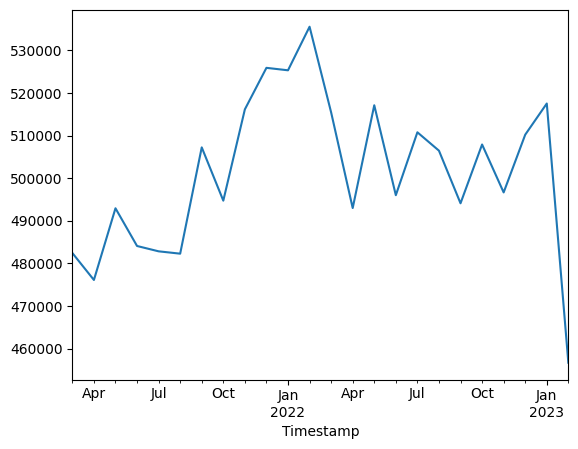

In [112]:
df_all.resample('ME', )['price'].sum().plot()
plt.show()